# Exploratory data analysis

## Library imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

## Import training data

In [2]:
train_df = pd.read_csv("E:/Current_Workdir/palm-fruit-classification/data/clean/train_df.csv")

In [3]:
train_df.head()

image   label_text
0  e:\Current_Workdir\palm-fruit-classification\d...  empty_bunch
1  e:\Current_Workdir\palm-fruit-classification\d...  empty_bunch
2  e:\Current_Workdir\palm-fruit-classification\d...  empty_bunch
3  e:\Current_Workdir\palm-fruit-classification\d...  empty_bunch
4  e:\Current_Workdir\palm-fruit-classification\d...  empty_bunch

## Class Proportion

<Axes: xlabel='label_text'>

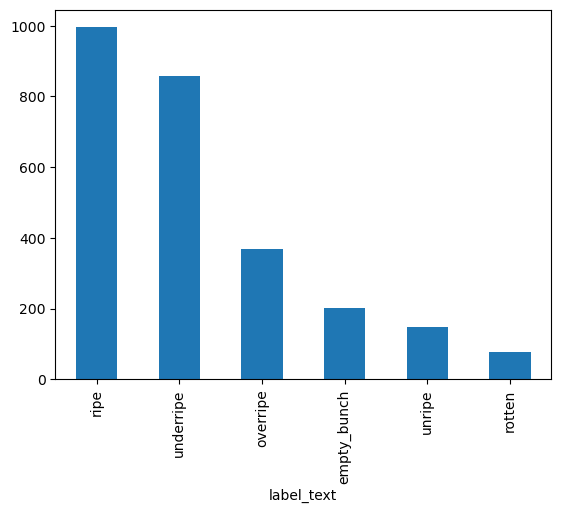

In [4]:
train_df["label_text"].value_counts().plot.bar()

In [5]:
train_df["label_text"].value_counts()

label_text
ripe           996
underripe      858
overripe       369
empty_bunch    201
unripe         147
rotten          78
Name: count, dtype: int64

<Axes: xlabel='label_text'>

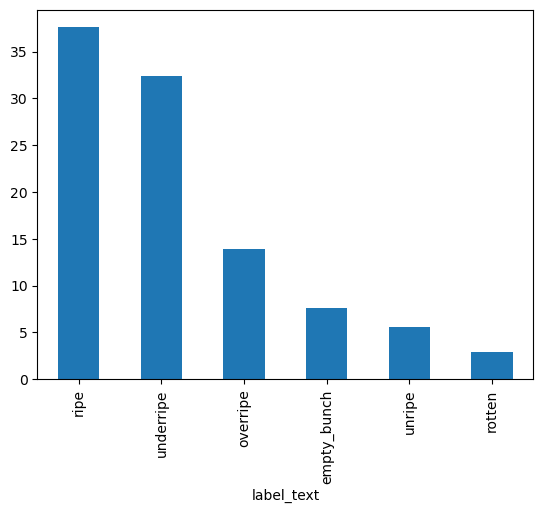

In [6]:
(train_df["label_text"].value_counts(normalize=True) * 100).plot.bar()

## Example images from every class

In [16]:
def display_samples_by_label(df, image_column='image', label_column='label_text', sample_size=8):
    
    unique_labels = df[label_column].unique()

    for label in unique_labels:
        
        label_df = df[df[label_column] == label]
        
        sampled_images = label_df[image_column].sample(min(sample_size, len(label_df)), random_state=42)

        fig, axes = plt.subplots(1, sample_size, figsize=(15, 5))
        fig.suptitle(f"Samples for label: {label}", fontsize=16)
        
        for ax, img_path in zip(axes, sampled_images):
            try:
                img = Image.open(img_path)
                ax.imshow(img)
                ax.axis('off')
            except Exception as e:
                ax.set_title("Error")
                ax.axis('off')
    
        for ax in axes[len(sampled_images):]:
            ax.axis('off')

        plt.tight_layout()
        plt.show()

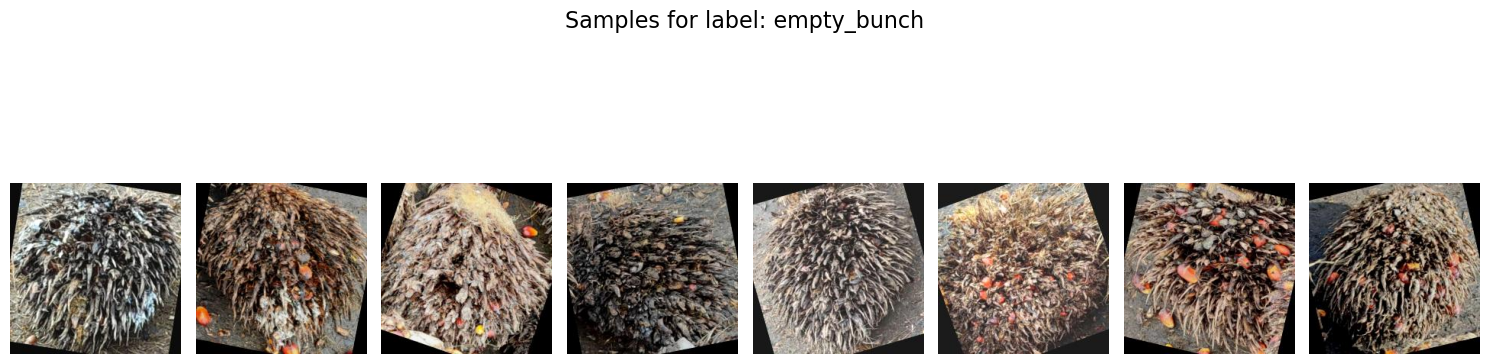

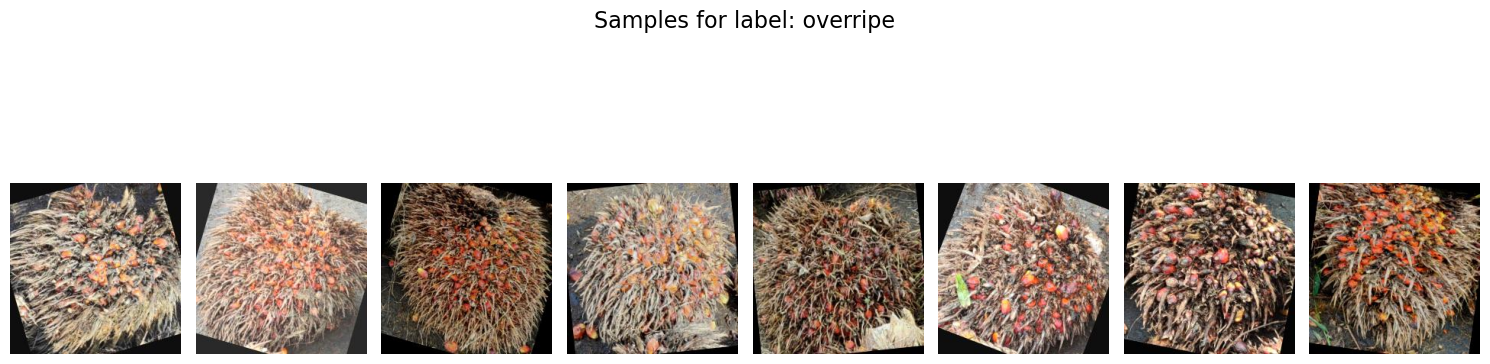

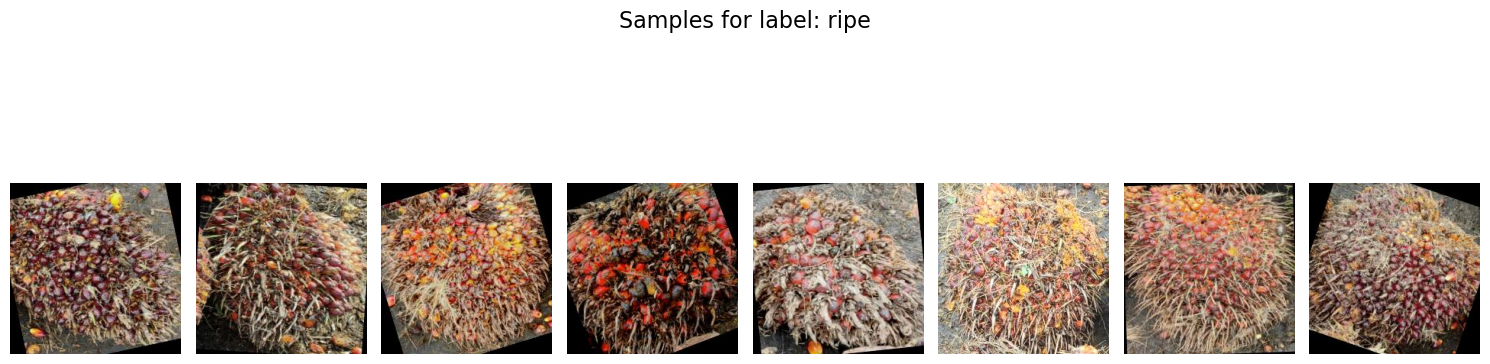

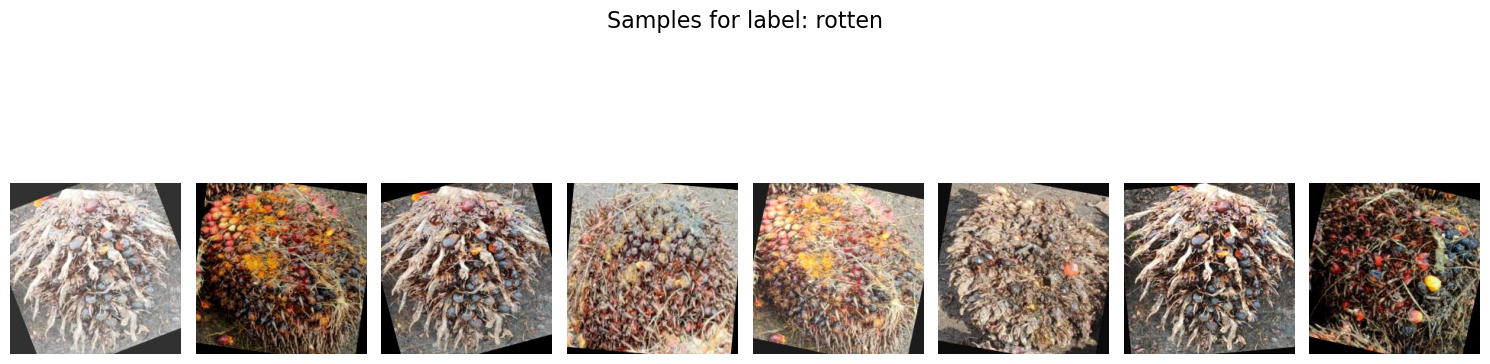

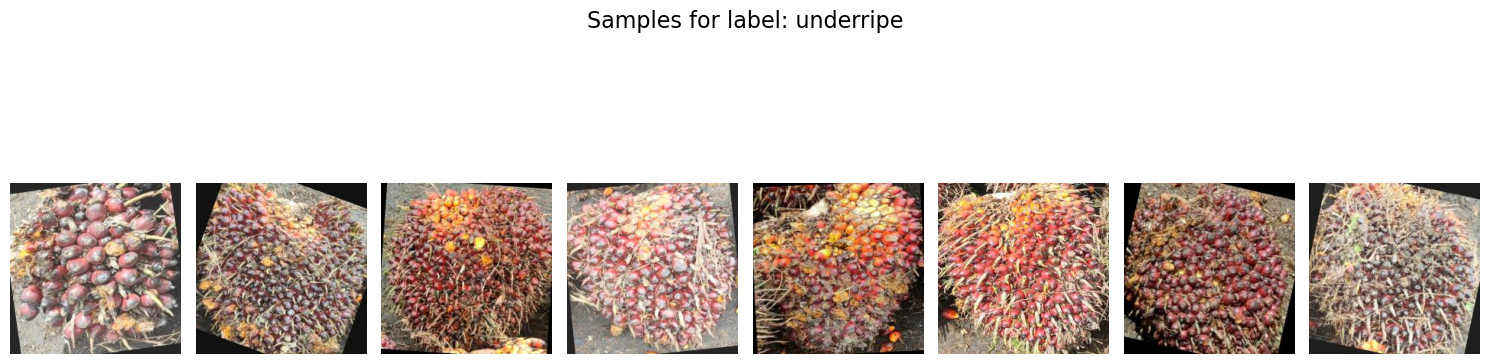

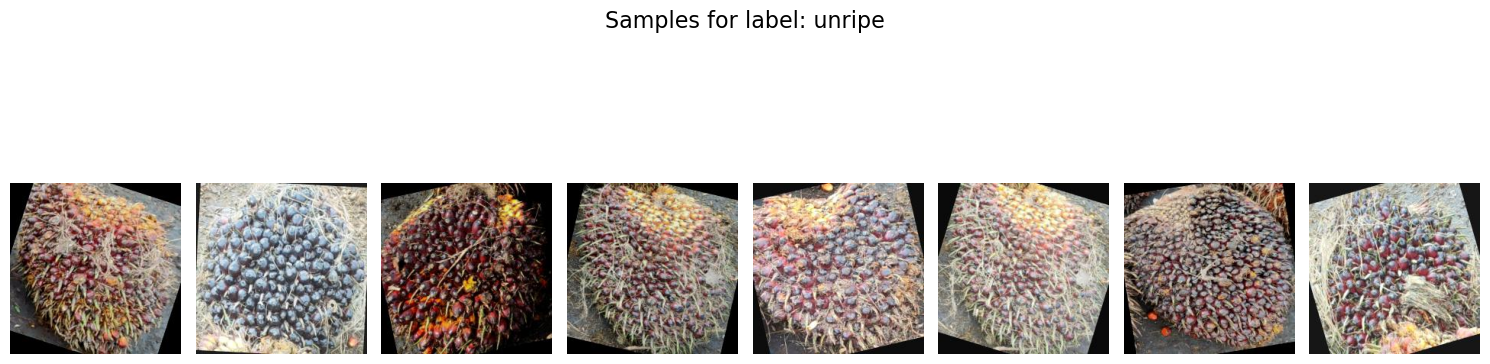

In [17]:
display_samples_by_label(train_df, image_column='image', label_column='label_text', sample_size=8)